In [ ]:
rosrun rqt_robot_steering rqt_robot_steering
# INPUT 
/cmd_vel_mux/input/teleop

In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

In [ ]:
$ rosservice call gazebo/get_model_state '{model_name: mobile_base}'

In [ ]:
$ rosnode info /cmd_vel_mux

In [ ]:
$ rosnode info /turtlebot_teleop_keyboard 

In [ ]:
$ rostopic echo /odom

In [ ]:
$ rostopic  echo /odom -n1

In [ ]:
rostopic pub /cmd_vel_mux/input/teleop geometry_msgs/Twist "linear:
  x: 0.5
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: 0.0" 

In [ ]:
rostopic pub -r 10 /cmd_vel_mux/input/teleop geometry_msgs/Twist "linear:
  x: 0.1
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: -0.6" 

In [ ]:
$ rosrun rqt_graph rqt_graph

In [ ]:
$ rostopic pub -r 10 /cmd_vel_mux/input/teleop geometry_msgs/Twist '{linear: {x: 0.1, y: 0, z: 0}, angular: {x: 0, y: 0, z: -1}}'

In [ ]:
$ roslaunch turtlebot_teleop keyboard_teleop.launch

In [ ]:
$ rosrun hrwros_week3 drive_turtlebot_circle.py

# **Week 3: Introduction to autonomous navigation**


**Overview**


1. Introduce	mobile	robots	

2.  Get	started	with	the	TurtleBot	

3.  Apply	knowledge	of	previous	weeks	
  * **Inspection**		
  * Write	Publishers	and	subscribers
  * **RViz**	


4. Autonomous	**navigation**

We will have 2 manipulators (**robot arms**) and a **mobile robot**. 

 * The mobile robot that we will use is the **TurtleBot** (mobile robot).



# **1. TurtleBot Introduction**


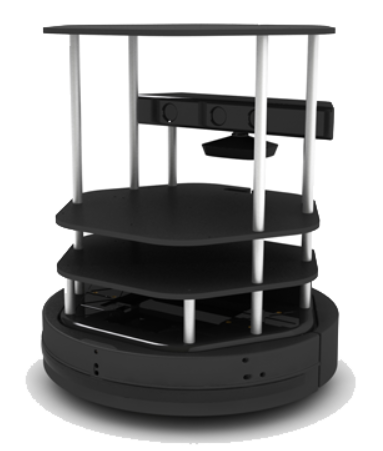

The main items that comprise the TurtleBot 2 model :

1. A **mobile base** (Kobuki Base) that also serves as support for the upper stages of the robot

2. A **netbook** (ROS Compatible) resting on a module plate

3. A **vision sensor** with a color camera and 3D depth sensor

4. Other module plates used to hold items

Overall, the TurtleBot model stands about 
 * **420 mm** (16.5 inches) **high** 

 * the base is approximately **355 mm** (14 inches) in **diameter**.

TurtleBot rests on the floor on two wheels and a caster. 

The base is configured as a **differential drive base**, which means that when the TurtleBot is moving,
*  the **rotational velocity** of the wheels can be controlled independently.

For example, TurtleBot **can move back and forth in a straight line** when the wheels are driven in the same direction,
*  clockwise (CW) or 
* counterclockwise (CCW), with the same rotational velocity.


If the wheels turn at different rotational velocities, TurtleBot can **make turns** as the velocity of the wheels is controlled.

# **2. Recap: Inpecting a running ROS application**

We will quickly refresh some essential contents of weeks 1 and 2 of the course. 


## **2.1 Fundamental	concepts**

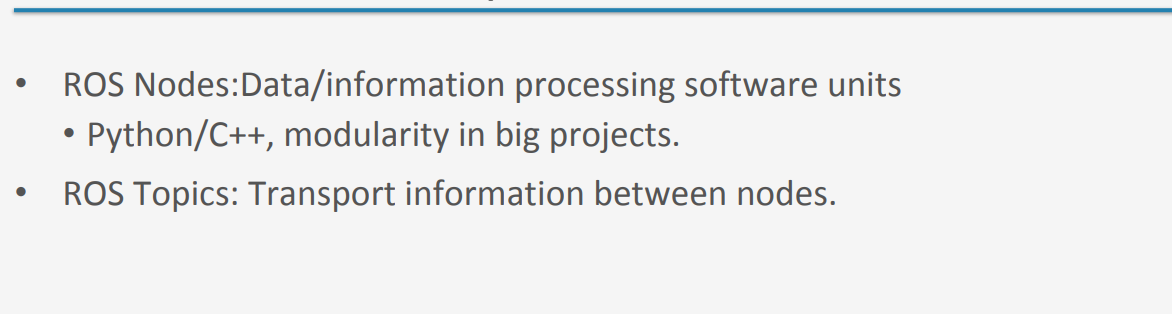

## **2.2 ROS	Inspection	commands**

- List	currently	running	nodes	on	the	terminal

In [ ]:
$ rosnode list

- List	currently	running	topics	on	the	terminal

In [ ]:
$ rostopic list

- Visual	representation	of	the	ROS	`“Node	Graph”	`

In [ ]:
$ rosrun rqt_graph rqt_graph

## **2.3 rqt_graph**

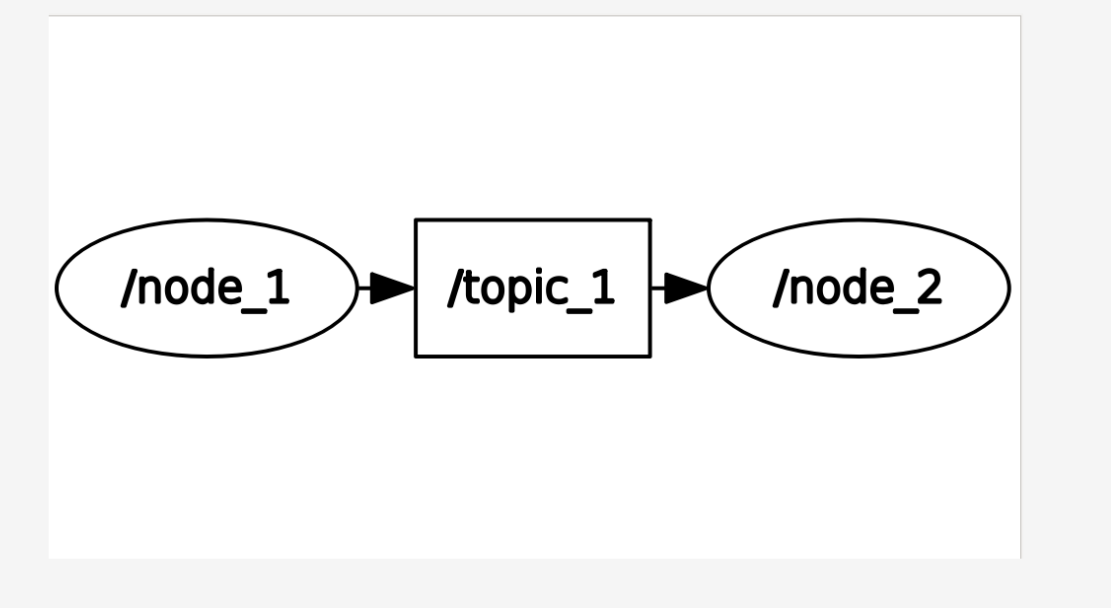

## **2.4 ROS	Inspection	commands**

- **`Node`**	specific	information	on	the	terminal	

In [ ]:
$ rosnode info <node_name> 

- **`Service`**	specific	information	on	the	terminal	

In [ ]:
$ rosservice info <service_name> 

- Get	the	value	of	a	specific	**`ROS	Parameter	`**

In [ ]:
$ rosparam get <parameter_name> 

# **3. Hands-on practice Part 1: Services**


## **TurtleBot in simulation**


In [ ]:
$ source $HOME/hrwros_ws/devel/setup.bash

In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

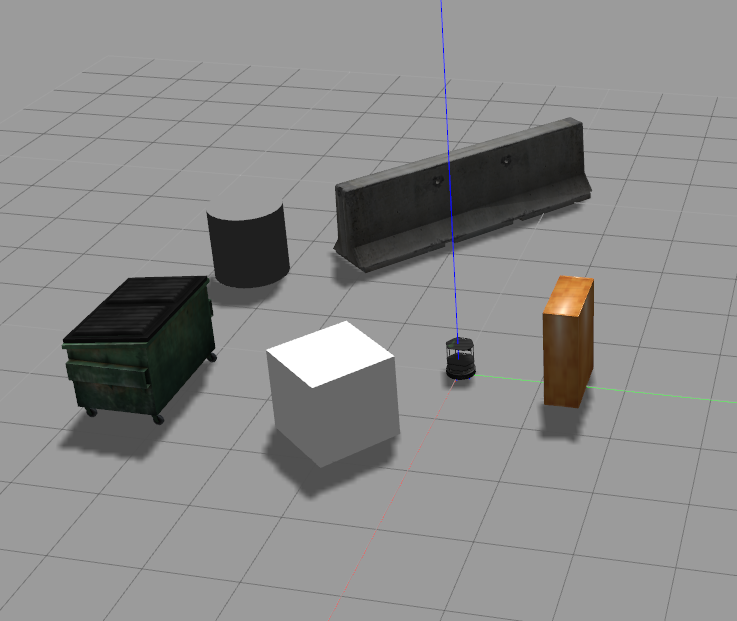

Now let's take a look at where the **TurtleBot** is located in our **environment**.

1. Choose the **`World`** tab on the Gazebo left panel.

2. Click on **`Models`**.

3. Click on **`mobile_base`** and in the window below, you will see two columns: 
 * **Property** and **Value**.

4. Click on the arrowhead at **`pose`**.


## **`Question 1 : Pose`**

* Look up the x, y and z coordinates of the `mobile_base` of the TurtleBot.

* All numbers are in metres, from the **`"world"`** reference frame.)

* What are the the `(x,y,z)` values of the `mobile_base`?

 



In [ ]:
(0,0,0)

## **`Question 2 : Pose`**

* What are the pose values of the trash bin (called as Dumpster) in the environment?


 



In [ ]:
(1, -3.44, 0)

## **`Question 3 : magnetic field`**

* What are the values of the magnetic field in the environment? 


 



In [ ]:
(0.000006, 0.000023,-0.000042)

In Week1 we covered ROS nodes, topics and services.


In [ ]:
$ rosservice list

How a lot of ROS Services shown do not concern the TurtleBot.

In [ ]:
$ rosservice list | grep mobile_base

## **`Question 4 : get_loggers`**

* Which of the following services are in the output of the last ROS command, meaning the services list related to the turtlebot mobile base?


 



In [ ]:
# list | grep mobile_base

/mobile_base_nodelet_manager/get_loggers
/mobile_base_nodelet_manager/list
/mobile_base_nodelet_manager/load_nodelet
/mobile_base_nodelet_manager/set_logger_level
/mobile_base_nodelet_manager/unload_nodelet

1. This service gets the different loggers of the **`mobile_base_nodelet_manager `**ROS node.
 *  Loggers can be used to modify what kind of log messages can be shown on the screen or written to log files.

2. **`list`** :  This service sets which level of log messages are to be displayed on the console or saved in the log files, for the corresponding logger of the **`mobile_base_nodelet_manager`** node. 
 * For example, **`INFO, ERROR, WARNING, FATAL`**, etc.

3. **`load_nodelet`** : This service relates to loading mobile base nodelets. 
 * **Nodelets** are advanced ways of **implementing ROS nodes** which are not dealt with in this course.


4. **`set_logger_level`**: This service relates to loading mobile base nodelets. 
 

5. **`unload_nodelet`** : This service lists all the nodelets managed by the mobile base nodelet manager. 


## **`Question 5 : get_model_state`**

* We looked at where the robot is located in the environment.


 



In [ ]:
rosservice call gazebo/get_model_state '{model_name: mobile_base}'

What is the value of the `'w' `component of the orientation (find it under **`pose:-> orientation: -> w`**)?


In [ ]:
0.9999



```
header: 
  seq: 2
  stamp: 
    secs: 1912
    nsecs: 160000000
  frame_id: ''
pose: 
  position: 
    x: 1.9857939120342858
    y: 2.6576217465870005
    z: -0.0011307400813293234
  orientation: 
    x: 0.0011666449675397195
    y: -0.0038244893946349115
    z: 0.28624878878716425
    w: 0.9581469840991369
twist: 
  linear: 
    x: 0.00020340477189496992
    y: -0.0002895287482817029
    z: 7.4135651262558924e-06
  angular: 
    x: -0.0027683996239972262
    y: -0.0018393604350035989
    z: 0.00016950261929367686
success: True
status_message: "GetModelState: got properties"

```



# **4. Hands-on practice Part 2 : Nodes and Topics**


Now we will explore the nodes and topics associated with the TurtleBot simulation.

**`ROS Nodes`**



In [ ]:
$ rosnode list



```
/bumper2pointcloud
/cmd_vel_mux
/depthimage_to_laserscan
/gazebo
/gazebo_gui
/laserscan_nodelet_manager
/mobile_base_nodelet_manager
/robot_state_publisher
/rosout

```



In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

## **`Question 1 : Active Nodes`**

* Which of the following nodes is active?



 



In [ ]:
/depthimage_to_laserscan

* This node **creates a fake laser scanner** by using the **depth data** from the **simulated Kinect sensor**.

*  This node supplies vital information for mapping and obstacle avoidance.

## **`Question 2 : Info Nodes`**


* What are the topics to which this node publishes?



In [ ]:
$ rosnode info /cmd_vel_mux

```
Node [/cmd_vel_mux]
Publications: 
 * /mobile_base_nodelet_manager/bond [bond/Status]
 * /rosout [rosgraph_msgs/Log]

Subscriptions: 
 * /clock [rosgraph_msgs/Clock]
 * /mobile_base_nodelet_manager/bond [bond/Status]

Services: 
 * /cmd_vel_mux/get_loggers
 * /cmd_vel_mux/set_logger_level
```



* **`/rosout [rosgraph_msgs/Log] :`**
 * Practically all nodes that print a log message to the terminal publish to the **`/rosout`** topic.


* **`/mobile_base_nodelet_manager/bond [bond/Status] :`** 
 * This is how the mobile base nodelet manager knows what velocity commands should be applied to the wheels of the turtlebot to make it move around.




In [ ]:
$ roslaunch turtlebot_teleop keyboard_teleop.launch

## **`Question 3 : Info Nodes`**

* Get the info about this node, and find out to which of the following topics does this node subscribe?



 



**`ROS Nodes`**



In [ ]:
rosnode info /turtlebot_teleop_keyboard 

In [ ]:
--------------------------------------------------------------------------------
Node [/turtlebot_teleop_keyboard]
Publications: 
 * /cmd_vel_mux/input/teleop [geometry_msgs/Twist]
 * /rosout [rosgraph_msgs/Log]

Subscriptions: 
 * /clock [rosgraph_msgs/Clock]

Services: 
 * /turtlebot_teleop_keyboard/get_loggers
 * /turtlebot_teleop_keyboard/set_logger_level

 * **`/clock [rosgraph_msgs/Clock]:`** This topic carries timing information to the **`keyboard_teleop`** ROS node.


## **`Question 4 : Odometry`**

* `Odometry` is the usage of data from motion sensors to estimate the change in position over time. 



 



In [ ]:
$ rostopic echo /odom

In [ ]:
$ rostopic  echo /odom -n1

In [ ]:
header: 
  seq: 77570
  stamp: 
    secs: 1551
    nsecs: 580000000
  frame_id: "odom"
child_frame_id: "base_footprint"
pose: 
  pose: 
    position: 
      x: -1.449831340302447
      y: 0.8455793038565187
      z: 0.0
    orientation: 
      x: -0.0
      y: 0.0
      z: -0.941724618360575
      w: -0.3363848141245817
  covariance: [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05]
twist: 
  twist: 
    linear: 
      x: 0.0
      y: 0.0
      z: 0.0
    angular: 
      x: 0.0
      y: 0.0
      z: -0.0007334210177197334
  covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
---

* Now we will focus only on the velocity of the Turtlebot, did you know that you can **echo only one section of the topic**, let's try it.  




In [ ]:
$ rostopic echo /odom/twist

In [ ]:
$ rostopic  echo /odom/twist -n1

In [ ]:
twist: 
  linear: 
    x: 0.0
    y: 0.0
    z: 0.0
  angular: 
    x: 0.0
    y: 0.0
    z: -0.00046172171134547374
covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
---

In [ ]:
$ rostopic  echo /odom/pose -n1

In [ ]:
pose: 
  position: 
    x: -1.449831340302447
    y: 0.8455793038565187
    z: 0.0
  orientation: 
    x: -0.0
    y: 0.0
    z: -0.9121554034931377
    w: -0.40984450695144253
covariance: [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1000000.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05]
---

* After running the last command, if you press the only the **`'j'`** key, which value of the **`/odom/twist`** message changes?


In [ ]:
angular: z

* **Answer :** The turtlebot rotates along the Z axis!


## **`Question 5 : Topic info /odom`**

* Which node are publishing to the topic **`/odom`** ?




 



In [ ]:
$ rostopic info /odom



```
Type: nav_msgs/Odometry

Publishers: 
 * /gazebo (http://pc-xxx-5520:40977/)

Subscribers: None
```



# **5. Hands-on practice part 3:Publishers and subscribers**


## **`Publishers and subscribers: TurtleBot`**

* In this assignment we will make an introduction on how you can move the robot without teleoperation.


* We have already moved the TurtleBot before using our keyboard, so we can look up to which topic the **`/turtlebot_keyboard_teleop`** node publishes.

In [ ]:
rosnode info /turtlebot_teleop_keyboard 

In [ ]:
--------------------------------------------------------------------------------
Node [/turtlebot_teleop_keyboard]
Publications: 
 * /cmd_vel_mux/input/teleop [geometry_msgs/Twist]
 * /rosout [rosgraph_msgs/Log]

Subscriptions: 
 * /clock [rosgraph_msgs/Clock]

Services: 
 * /turtlebot_teleop_keyboard/get_loggers
 * /turtlebot_teleop_keyboard/set_logger_level

## **`Question 1 : Topic info /teleop`**

* To which of the following topics does the **`/turtlebot_teleop_keyboard `**node publish?


 




 



In [ ]:
/cmd_vel_mux/input/teleop

1. Now let's **move** the TurtleBot in a **simple straight line**.

In [ ]:
rostopic pub /cmd_vel_mux/input/teleop geometry_msgs/Twist "linear:
  x: 0.5
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: 0.0" 

2. Another option is publish the topic with a specific rate.

*  Publish the command with a rate of **10 Hz** and will make the TurtleBot move in circles. 

In [ ]:
rostopic pub -r 10 /cmd_vel_mux/input/teleop geometry_msgs/Twist "linear:
  x: 0.1
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: -0.6" 

3.  Publish the command with a rate of **10 Hz** and will make the TurtleBot rotate at same place. 

In [ ]:
rostopic pub -r 10 /cmd_vel_mux/input/teleop geometry_msgs/Twist "linear:
  x: 0.0
  y: 0.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: -0.6" 

In [ ]:
$ rosrun rqt_graph rqt_graph

You should see the node publishing to the **`/cmd_vel_mux/input/teleop`**

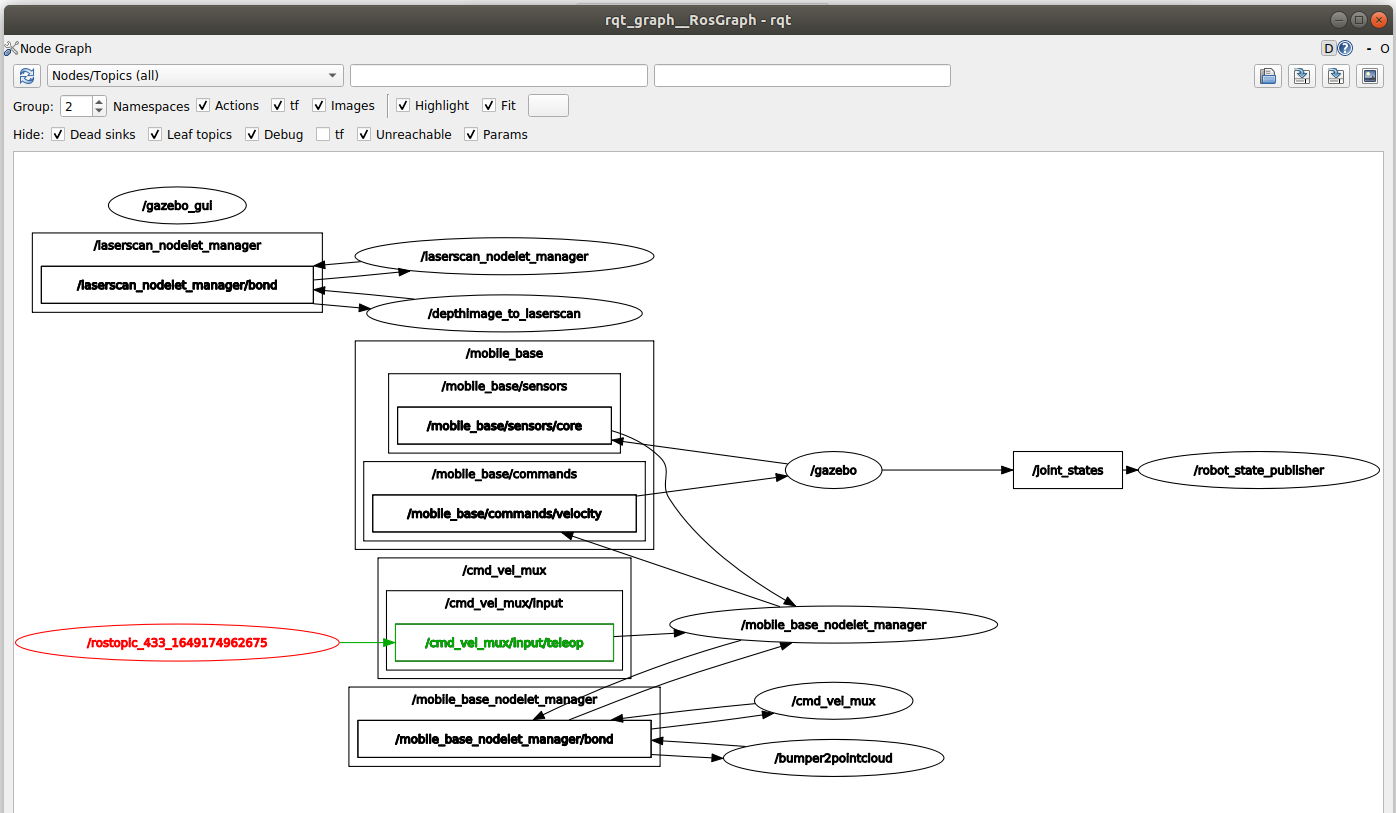

**`Note:`** The node it's called **`/rostopic_XXX_XXXXXXX`** however, this is not a ROS topic. 

* It's a ROS node. That's is why it's an ellipse.

*  The name is generated automatically since we are publishing via our CCS. 

Now that you have successfully controlled the turtlebot from a CCS,  we can basically do the same thing but with a simple python script.

# **6. Hands-on practice part 4**


## **Python Script to control the TrutleBot**


1. Writing your first publisher

 * Remember that a topic is not a message itself

2. Naming your nodes correctly

3. What type of messages we need to use





## **`Question 1 :` Naming your nodes**

* Which of the following node names you think is best, for a publisher that moves the turtlebot in circles?


```
/node_turtlebot

Ans: /drive_turtlebot_circle

/walking

```







 




 



## **`Question 2 :` Topic to publish**

* Next we need to find out to which topic we are going to publish. Remember that it will be the same topic we used to send commands through the CCS.

* What is the name of the **topic** we should **publish** to?


```
/odom

Ans : /cmd_vel_mux/input/teleop

/turtle_move_base
```







 




 



 3. It's time to find out what type of messages we need to use.

In [ ]:
 rostopic info /cmd_vel_mux/input/teleop

In [ ]:
Type: geometry_msgs/Twist

Publishers: None

Subscribers: 
 * /mobile_base_nodelet_manager (http://akumar-Latitude-5520:40945/)

## **`Question 3 :` Message type of the topic**

* What is the message type of the topic we're using?

 **Ans :** `/geometry_msgs/Twist`








 




 



4. To find information about a specific message type, you can use the rosmsg show command.

In [ ]:
$ rosmsg show geometry_msgs/Twist



```
geometry_msgs/Vector3 linear
  float64 x
  float64 y
  float64 z
geometry_msgs/Vector3 angular
  float64 x
  float64 y
  float64 z
```



## **`Question 4:` Message type field**

* How many fields does our message type have?

* Ans : 6 



## **Template Code**

Using your favorite editor, create the **`<answer-to-Q1>.py`** script
*  on the **`$HOME/hrwros_ws/src/hrwros_week3/scripts`** folder. 

There are 3 spaces you have to fill:

1. `[answer-to-Q2]` is the **topic name**, we find out on Question 2

2. `[linear-axis]` is the **axis** for **linear movement** of the turtlebot.

3. `[angular-axis]` is the **axis** for **rotation** of the turtlebot.

In [ ]:
#!/usr/bin/env python3
## Node to drive the turtlebot in circles.


import rospy
from geometry_msgs.msg import Twist

rospy.init_node('drive_turtlebot_circle')
pub = rospy.Publisher([answer-to-Q1], Twist, queue_size=1)
rate = rospy.Rate(2)
move = Twist()
move.linear.[linear-axis] = 0.2 #Move the robot with a linear velocity in the [] axis
move.angular.[angular-axis] = 0.5 #Move the with an angular velocity in the [] axis

while not rospy.is_shutdown():
  pub.publish(move)
  rate.sleep()

In [ ]:
import rospy
from geometry_msgs.msg import Twist

if __name__ == '__main__':

    rospy.init_node('drive_turtlebot_circle')
    pub = rospy.Publisher('cmd_vel_mux/input/teleop', Twist, queue_size=1)
    rate = rospy.Rate(2)
    move = Twist()
    move.linear.x = 0.2  # Move the robot with a linear velocity in the x axis
    move.angular.z = 0.5  # Move the with an angular velocity in the z axis
    
    # rospy.loginfo("linear velocity in the x axis = %f and angular velocity in z axis = %f"%(move.linear.x,move.angular.z))
    while not rospy.is_shutdown():
        pub.publish(move)
        rate.sleep()


In [ ]:
$ roscd hrwros_week3/scripts            // move to the script location
$ chmod a+x <answer-to-Q1>.py		// make the script executable	

# **7. Hands-on practice part 5**

In this section, we will use **RViz** to visualize what the robot is doing. 

* RViz is a great tool for debugging. 

**Step 1 :** launch the TurtleBot world.



In [ ]:
$ roslaunch turtlebot_gazebo turtlebot_world.launch

In [ ]:
$ roslaunch turtlebot_rviz_launchers view_robot.launch

**Step 2 :** So what are we going to visualize in RViz? 

* Let's do Odometry! 

* **Odometry** is the use of data from motion sensors to estimate change in position over time. 

In [ ]:
$ rostopic echo /odom

Since the robot is not moving there is not much to change. 

## **7.1 Move the robot**

We have learned 3 ways to move the turtlebot : 

1.  Publishing directly on the CCS.

In [ ]:
$ rostopic pub -r 10 /cmd_vel_mux/input/teleop geometry_msgs/Twist '{linear: {x: 0.1, y: 0, z: 0}, angular: {x: 0, y: 0, z: -1}}'

2. Using the keyboard_teleop functionality. 


In [ ]:
$ roslaunch turtlebot_teleop keyboard_teleop.launch

 3. Using our python script to control the turtlebot. 


In [ ]:
$ rosrun hrwros_week3 drive_turtlebot_circle.py

* See the values change in the `/odom` topic

## **7.2 RViz in order to visualize the odometry**

* Let's move over now to RViz in order to visualize the odometry



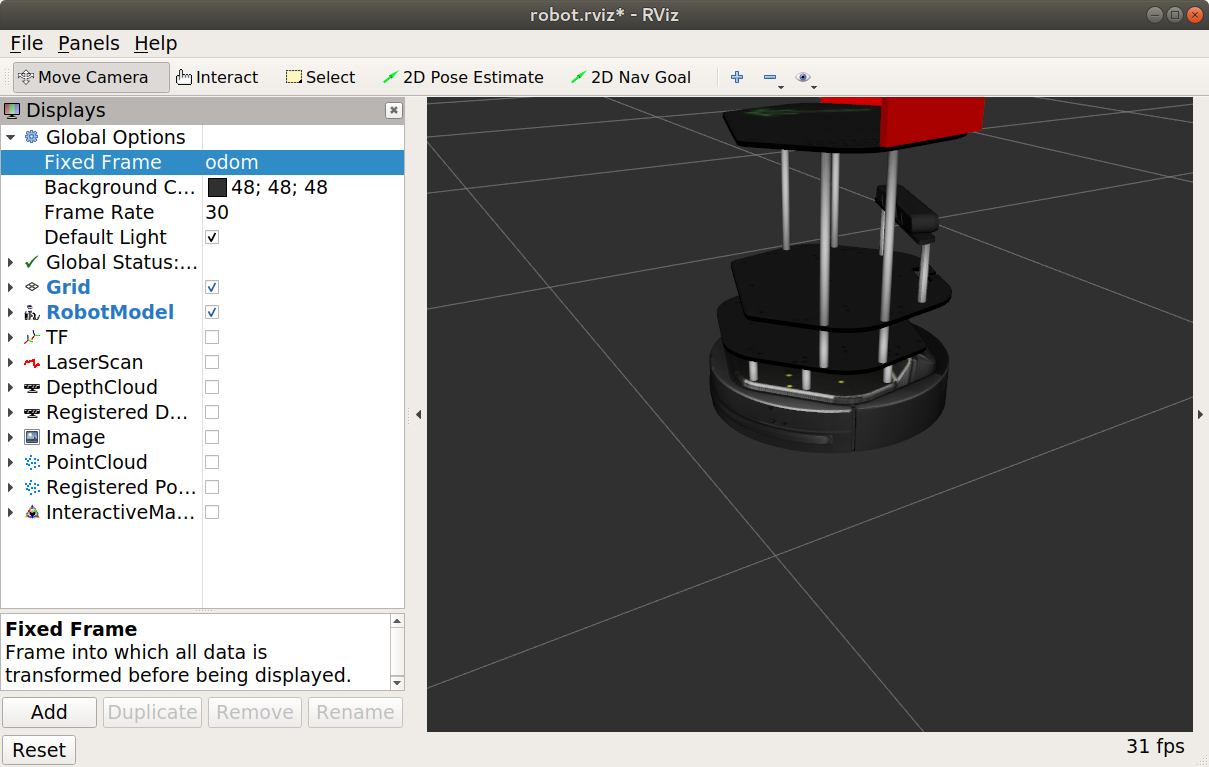

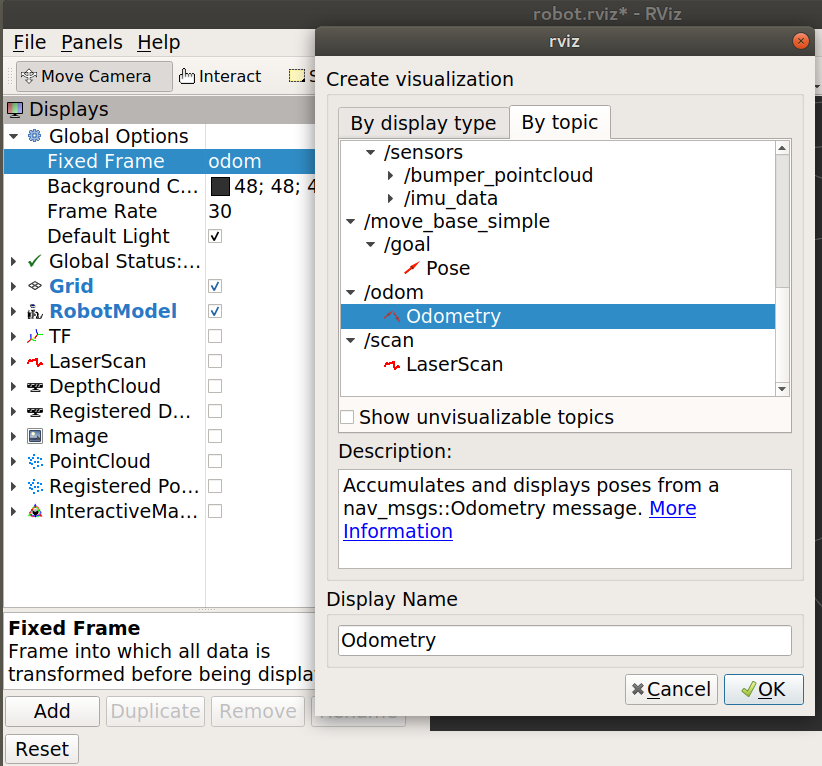

* Make sure the topic name is` /odom`,

*  uncheck the `covariance` checkbox and set the Keep value to 10.
